


# Vamos encher o carrinho!

# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

## Plano de solução



Analisar os dataframes para definir quais parâmetros preciso usar ao lê-los. Após isto, imprimir as informações e fazer uma análise inicial.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
df_instacart = pd.read_csv("/datasets/instacart_orders.csv", sep= ";")
df_products = pd.read_csv("/datasets/products.csv", sep= ";")
df_aisles = pd.read_csv("/datasets/aisles.csv", sep= ";")
df_departments = pd.read_csv("/datasets/departments.csv", sep= ";")
df_orders = pd.read_csv("/datasets/order_products.csv", sep= ";")

In [4]:
# imprima as informações sobre o DataFrame
print(df_instacart.info())
print(df_instacart.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 

In [5]:
# imprima as informações sobre o DataFrame
print(df_products.info())
print(df_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             1

In [6]:
# imprima as informações sobre o DataFrame
print(df_aisles.info())
print(df_aisles.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [7]:
# imprima as informações sobre o DataFrame
print(df_departments.info())
print(df_departments.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [8]:
# imprima as informações sobre o DataFrame
print(df_orders.info(show_counts= True))
print(df_orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


## Conclusões

Os DataFrames de "order", "department" e "instacart" tem valores nulos. Todos os nomes de colunas parecem estar em "snake_case". Existem colunas semelhantes em alguns DataFrames que poderemos usar para cruzar os dados.

As horas estão em formato 24 horas e os dias numerados de 0 a 6.

# Etapa 2. Preparação de dados


## Plano de solução



Verificar os valores ausentes, entender onde é necessário removê-los ou substitui-los e analisar se eles são relevantes ou não para a análise.

### DataFrame `instacart_orders`

In [9]:
# Verificar se há pedidos duplicados

print(df_instacart[df_instacart.duplicated(keep= False)].sort_values("order_id")) #assim consigo ver as linhas duplicadas. Uso o parâmetro "keep" para manter as linhas originais na impressão
print()
print(df_instacart["order_id"].duplicated().sum()) #prova real para contar quantas linhas estão duplicadas.

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
354993    391768    57671            19          3                  2   
371905    391768    57671            19          3                  2   
119251    408114    68324             4          3                  2   
321100    408114    68324             4          3                  2   
394347    467134    63189            21          3                  2   
250626    467134    63189            21          3                  2   
99462     794638    50898            24          3                  2   
145574    794638    50898            24          3                  2   
311713   1021560    53767             3          3                  2   
242618   1021560    53767             3          3                  2   
164581   1112182   202304            84          3                  2   
273805   1112182   202304            84          3                  2   
314427   1286742   183220            48          3 


Sim, há 15 linhas duplicadas. Todos os pedidos foram feitos às quartas-feiras às 2h da manhã

In [ ]:
# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras
wed_2am = df_instacart[(df_instacart["order_dow"] == 3) & (df_instacart["order_hour_of_day"] == 2)]

print(wed_2am.head(15))

       order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838    2766110   162084            41          3                  2   
5156    2190225   138285            18          3                  2   
15506    553049    58599            13          3                  2   
18420    382357   120200            19          3                  2   
24691    690242    77357             2          3                  2   
25376   1378085    75705            21          3                  2   
26301   2846262   176827             2          3                  2   
29129    353088    46038             4          3                  2   
30371   1918001   188546            14          3                  2   
31404   1725788   147843            10          3                  2   
48024   1453300    69262            27          3                  2   
52245   2851380   118608            33          3                  2   
62357   1399416    93151            34          3               

O que esse resultado quer dizer?

Que existem vários pedidos às 2 da manhã da quarta e nem todos são duplicados.

In [ ]:

#como cada order_id deve representar um pedido específico, não há problemas em apagar as duplicatas. 
df_instacart = df_instacart.drop_duplicates() #apagando duplicatas e reatribuindo

In [ ]:


print(df_instacart.duplicated().sum())

0


In [ ]:

print(df_instacart["order_id"].duplicated().sum())


0




Descreva brevemente suas conclusões e o que você fez com elas.

Percebi que todas as ocorrências de duplicatas (15) haviam ocorrido nas quartas às 02 da manhã. Por isso, verifiquei se todos os pedidos deste espaço temporal foram duplicados (o que não se provou verdadeiro). Também notei que não era apenas a coluna "order_id" que estava duplicada nestes casos, mas sim todas.

Em seguida, apaguei todas as linhas duplicadas (afinal o "order_id" deve ser único e exclusivo para cada pedido, e geração das duplicatas provavelmente foi algum erro do sistema) e conferi tudo novamente.

### DataFrame `products`

In [14]:
# Verifique se há linhas completamente duplicadas

print(df_products.duplicated().sum())

0


In [15]:
# Verifique apenas IDs dos produtos duplicados

print(df_products["product_id"].duplicated().sum())

0


In [16]:
# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)

df_products["product_name"] = df_products["product_name"].str.lower() #colocando em minúscula e reatribuindo
print(df_products["product_name"].unique()) #verificando se todos estão em minuscula
print() #espaço em branco para ficar mais legível para o revisor :D
print(df_products["product_name"].duplicated(keep= False).sum())

['chocolate sandwich cookies' 'all-seasons salt'
 'robust golden unsweetened oolong tea' ... 'artisan baguette'
 'smartblend healthy metabolism dry cat food' 'fresh foaming cleanser']

1465


In [17]:
# Verifique os nomes de produtos duplicados que não estão faltando
duplicated = df_products[df_products["product_name"].duplicated(keep= False) &  df_products["product_name"].notna()] #atribuindo os duplicados à uma variável, notna() exclui os que estão faltando
print(duplicated.sort_values("product_name")) 

       product_id                               product_name  aisle_id  \
23339       23340  18-in-1 hemp peppermint pure-castile soap        25   
31844       31845  18-in-1 hemp peppermint pure-castile soap        25   
19941       19942            aged balsamic vinegar of modena        19   
13152       13153            aged balsamic vinegar of modena        19   
24830       24831         albacore solid white tuna in water        95   
...           ...                                        ...       ...   
46873       46874                         vitamin d3 5000 iu        47   
21366       21367              wild sardines in spring water        95   
40093       40094              wild sardines in spring water        95   
1826         1827           yams cut sweet potatoes in syrup        81   
38260       38261           yams cut sweet potatoes in syrup        81   

       department_id  
23339             11  
31844             11  
19941             13  
13152             1


Verifiquei duplicados. Na coluna "product name" existem alguns produtos duplicados, o que pode ser um problema, além de produtos com nome faltando.

### DataFrame `departments`

In [ ]:

print(df_departments.duplicated().sum())

0


In [ ]:
print(df_departments["department_id"].duplicated().sum())

0



Não há dados duplicados

### DataFrame `aisles`

In [20]:
# Verifique se há linhas completamente duplicadas

print(df_aisles.duplicated().sum())

0


In [21]:
# Verifique apenas se há IDs dos produtos duplicados
print(df_aisles["aisle_id"].duplicated().sum())

0


Descreva brevemente suas conclusões e o que você fez com elas.

Não há linhas completamente duplicadas nem valores na coluna "aisle_id"

### DataFrame `order_products`

In [22]:
# Verifique se há linhas completamente duplicadas
print(df_orders.duplicated().sum())

0


In [23]:
# Verifique mais uma vez se há outros casos complicados de duplicados

print(df_orders["order_id"].duplicated().sum())

4094961




Não há linhas completamente duplicadas. Em colunas como "order_id" e "product_id" existem duplicatas, o que é natural pois cada linha representa um produto adicionado ao pedido, então é natural que hajam mais de uma ocorrência destes IDs



Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [24]:
# Encontre valores ausentes na coluna 'product_name'

print(df_products[df_products["product_name"].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]




Todos os valores ausentes parecem estar no corredor ID 100

In [25]:
# Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?

miss_names = df_products[df_products["product_name"].isna()] #criando uma variável com os valores ausentes na coluna "product name"
print((miss_names["aisle_id"] == 100).sum()) #somando a quantidade de valores ausentes na coluna product name em que a coluna de corredor tem valor 100
print()
print(df_products.isna().sum()) #somando a quantidade total de valores ausentes, para comparação

1258

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64



Sim, todos os produtos sem nome estão associados ao corredor de ID 100

In [26]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?

miss_names = df_products[df_products["product_name"].isna()] #criando uma variável com os valores ausentes na coluna "product name"
print((miss_names["department_id"] == 21).sum()) #somando a quantidade de valores ausentes na coluna product name em que a coluna de departamento tem valor 21
print()
print(df_products.isna().sum()) #somando a quantidade total de valores ausentes, para comparação

1258

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64




Sim, todos os produtos com nome ausente estão associados ao departamento de id 21

In [ ]:

print(df_departments[df_departments["department_id"] == 21])
print()
print(df_aisles[df_aisles["aisle_id"] == 100])

    department_id department
20             21    missing

    aisle_id    aisle
99       100  missing



As informações necessárias estão faltando tanto na planilha de corredores quanto na de departamentos. Isso impossibilita descobrirmos os produtos faltando, com as informações que temos em mãos.

In [ ]:

df_products["product_name"] = df_products["product_name"].fillna(value= "Unknown") #substituindo valores ausentes por "Unknown"
print(df_products.isna().sum()) #verificando

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64



Era impossível, com o que temos em mãos, descobrir qual produto está ausente. Por isso, preenchemos estes valores com Unknown 

### DataFrame `orders`

In [29]:
# Encontre os valores ausentes

print(df_instacart.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [30]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?

miss_first = df_instacart[(df_instacart["order_number"] > 1) & (df_instacart["days_since_prior_order"].isna())]

print(miss_first.head())

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []



Há vários valores ausentes na coluna "days_since_prior_order". Quando filtramos colunas em que o valor do "order_number" é maior que 1 (ou seja, já é o segundo pedido) e o valor de "days_since_prior_order" está vazio, o resultado é um DataFrame vazio. Isso significa que não há linhas com essas condições e que os valores ausentes em "days_since_prior_order" significam simplesmente que foi a primeira compra da pessoa.

### DataFrame `order_products`

In [31]:
# Encontre os valores ausentes

print(df_orders.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [32]:
# Quais são os valores mínimo e máximo dessa coluna?
print(df_orders["add_to_cart_order"].min())
print()
print(df_orders["add_to_cart_order"].max())

1.0

64.0



O número máximo de produtos em um pedido é 64 e o número mínimo é 1

In [33]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'


add_cart_miss = df_orders[df_orders["add_to_cart_order"].isna()]

print(add_cart_miss.head())

       order_id  product_id  add_to_cart_order  reordered
737     2449164        5068                NaN          0
9926    1968313       43867                NaN          0
14394   2926893       11688                NaN          0
16418   1717990        4142                NaN          0
30114   1959075       42828                NaN          1


In [ ]:


group_miss = add_cart_miss.groupby("order_id") #agrupa os pedidos com valores ausentes por "order_id"
products_per_order = group_miss["product_id"].count()


print(products_per_order)
print()
print(products_per_order.min())

order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64

1



Os pedidos com valores ausentes não tem mais de 64 produtos necessariamente. 

In [35]:

# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer

df_orders["add_to_cart_order"] = df_orders["add_to_cart_order"].fillna(value= 999).astype(int) #preenchendo valores ausentes com 999 e convertendo para integer
print(df_orders.isna().sum()) 
print(df_orders["add_to_cart_order"].dtype) #verificando se funcionou 



order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
int64



Identifiquei e analisei os valores ausentes da coluna "add_to_cart_order" e substituí por 999

## Conclusões

No geral, os dados estavam bem formatados. Foram corrigidos alguns erros pontuais como duplicatas e valores ausentes. Não foi possível descobrir as informações reais que deveriam constar nas colunas dos DataFrames que continham valores ausentes, por isso preenchi com outros valores. 

Sobre as duplicatas, algumas não eram prejudiciais à análise enquanto outras poderiam ser. Estas últimas foram apagadas.

# Etapa 3. Análise de dados



### [A1] Verifique se os valores fazem sentido

In [36]:

print(df_instacart["order_hour_of_day"].min())
print(df_instacart["order_hour_of_day"].max())
 #verificando se os valores estão entre 0 e 23

0
23


In [37]:
print(df_instacart["order_dow"].min())
print(df_instacart["order_dow"].max()) #verificando se os valores estão entre 0 e 6

0
6


Os valores parecem estar de acordo com o esperado

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

<AxesSubplot:title={'center':'Horários com maior fluxo de pedidos'}, xlabel='Horas do dia', ylabel='Número de pedidos'>

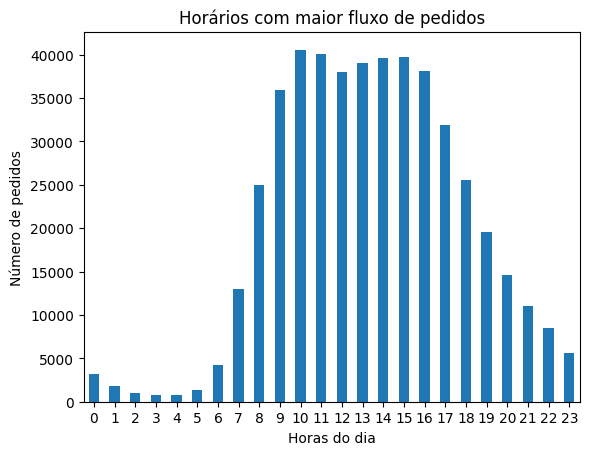

In [38]:
orders_per_hour = df_instacart["order_hour_of_day"].value_counts().sort_index() # contando os valores únicos em horas por dia e classificando por ordem
orders_per_hour.plot(kind= "bar", rot= 360, ylabel= "Número de pedidos", xlabel= "Horas do dia", title= "Horários com maior fluxo de pedidos")



Há um maior fluxo de pedidos nos horários comerciais, mais especificamente entre 09h e 16h

### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

['frozen' 'other' 'bakery' 'produce' 'alcohol' 'international' 'beverages'
 'pets' 'dry goods pasta' 'bulk' 'personal care' 'meat seafood' 'pantry'
 'breakfast' 'canned goods' 'dairy eggs' 'household' 'babies' 'snacks'
 'deli' 'missing']

   order_id  product_id  add_to_cart_order  reordered  \
0   2141543       11440                 17          0   
1    567889        1560                  1          1   
2   2261212       26683                  1          1   
3    491251        8670                 35          1   
4   2571142        1940                  5          1   

                                        product_name  aisle_id  department_id  \
0                     chicken breast tenders breaded       129              1   
1                                         bag of ice        37              1   
2  cafe latte pure lightly sweetened iced coffee ...        91             16   
3                                     diced tomatoes        81             15   
4            

<AxesSubplot:title={'center':'Dias com maior volume de compras de produtos alimentícios'}, ylabel='Número de Compras'>

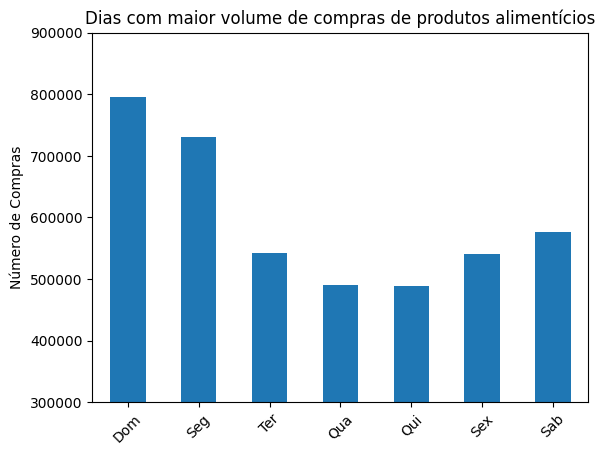

In [39]:
print(df_departments["department"].unique()) #verificando os departamentos

data = df_orders.merge(df_products, on="product_id", how="left")
data = data.merge(df_departments, on="department_id", how="left")
data = data.merge(df_instacart, on= "order_id", how="left") #Combinando todos os DataFrames necessários pelas colunas que eles tem em comum

print()
print(data.head())#verificando

food_departments = [ 'frozen','bakery','produce','alcohol','international','beverages',
    'meat seafood','pantry','breakfast','canned goods','dairy eggs',
    'snacks','deli'] #separando os departamentos alimentícios em uma lista

food = data[data["department"].isin(food_departments)] #filtrando apenas os departamentos alimentícios
food_per_day = food["order_dow"].value_counts().sort_index() #filtrando por dia da semana, contando valores e classificando por ordem 
food_per_day.index = ["Dom", "Seg", "Ter", "Qua", "Qui", "Sex", "Sab"] #renomeando os índices para facilitar a leitura

food_per_day.plot(kind="bar", title= "Dias com maior volume de compras de produtos alimentícios", ylabel= "Número de Compras", rot= 45, ylim=(300000, 900000))

#limitei o eixo y para melhorar a visualização



As pessoas preferem comprar produtos alimentícios no começo das semanas (principalmente aos domingos e às segundas). O volume de compras diminui no meio da semana e voltam a crescer no sábado.

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?



Boa parte das pessoas faz outros pedidos dentro dos 10 primeiros dias. Passando deste marco temporal, haverá uma frequência maior de recompra apenas aos 30 dias após a primeira compra.

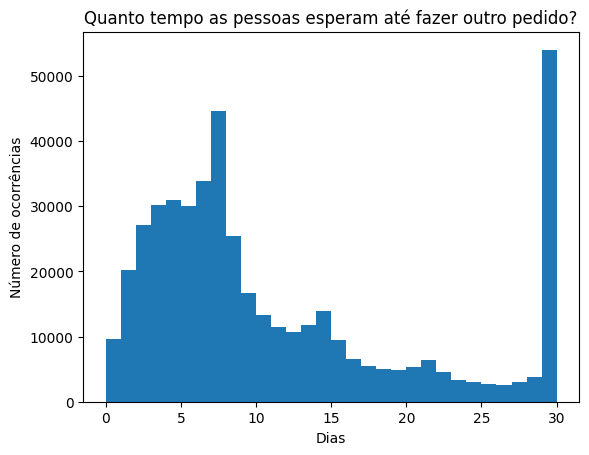

In [40]:

df_instacart["days_since_prior_order"].dropna() #retirando valores ausentes
df_instacart["days_since_prior_order"].plot(kind= "hist", bins=30, grid= False, title= "Quanto tempo as pessoas esperam até fazer outro pedido?") 
plt.ylabel("Número de ocorrências")
plt.xlabel("Dias")
plt.show()


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

In [41]:
wed_time = df_instacart[df_instacart["order_dow"] == 3].groupby("order_hour_of_day")["order_id"].count() #agrupando pedidos feitos nas Quartas, agrupando por hora e contando os pedidos por hora.
print(wed_time) #verificando

order_hour_of_day
0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_id, dtype: int64


In [42]:
sat_time = df_instacart[df_instacart["order_dow"] == 6].groupby("order_hour_of_day")["order_id"].count() #agrupando pedidos feitos nos Sábados, agrupando por hora e contando os pedidos por hora.
print(sat_time.head())#verificando

order_hour_of_day
0    464
1    254
2    177
3    125
4    118
Name: order_id, dtype: int64


In [43]:

comparing = pd.concat([wed_time, sat_time], axis=1, keys= ["Quarta-Feira", "Sábado"]) #concatenando os dataframes por coluna (usando axis=1) e nomeando as colunas (usando keys=)

print(comparing.head()) #testando

                   Quarta-Feira  Sábado
order_hour_of_day                      
0                           373     464
1                           215     254
2                           106     177
3                           101     125
4                           108     118


<AxesSubplot:title={'center':'Variação nos horários de compra de acordo com dia'}, xlabel='Hora do Dia', ylabel='Número de Pedidos'>

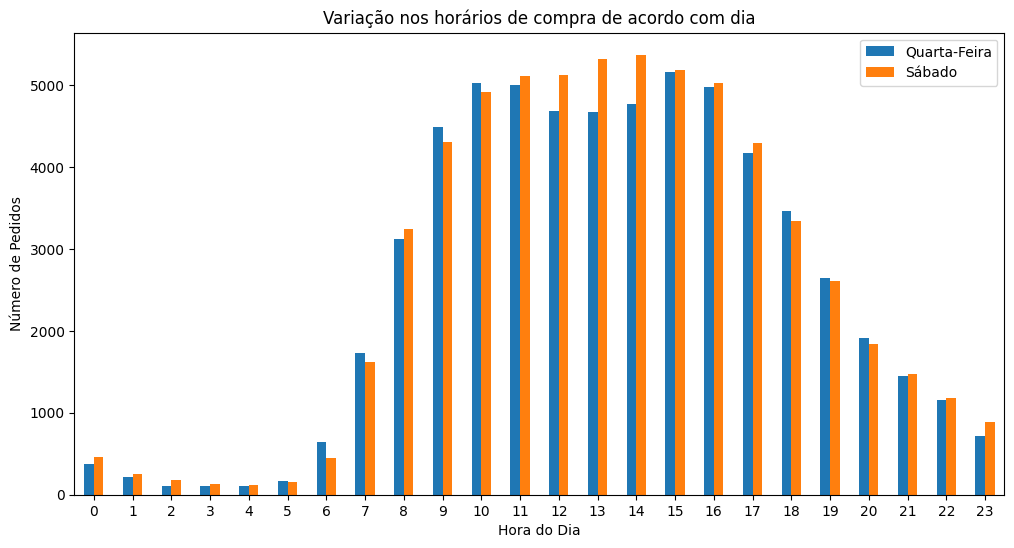

In [44]:
comparing.plot(kind= "bar", ylabel= "Número de Pedidos", xlabel= "Hora do Dia", title= "Variação nos horários de compra de acordo com dia", rot= 360, figsize=(12, 6))



No geral, os horários do dia preferidos pelos clientes não variam muito sendo Quarta ou Sábado. Só notamos que o pico de pedidos tende a ser um pouco mais tarde nos sábados.

### [B2] Qual é a distribuição do número de pedidos por cliente?

In [45]:

order_per_client = df_instacart.groupby("user_id")["order_number"].max() #Filtrando por order number de cada user  id. Pegando o valor máximo que representará quantos pedidos aquele user_id fez (dado que é impossível diminuir a quantidade de pedidos feitos por uma pessoa). 
print(order_per_client.head()) #testando

print()

dist_count = order_per_client.value_counts().sort_index() #contando os valores e classificando por ordem
print(dist_count.head())

user_id
2     4
4     6
5     4
6     4
7    19
Name: order_number, dtype: int64

1     7840
2     9113
3    10510
4    12368
5    10406
Name: order_number, dtype: int64


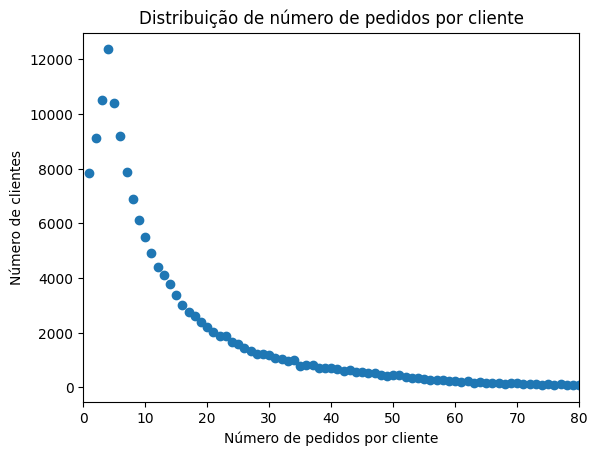

In [46]:
#criando o gráfico
plt.scatter(dist_count.index, dist_count.values, alpha= 1)
plt.ylabel("Número de clientes")
plt.xlabel("Número de pedidos por cliente")
plt.title("Distribuição de número de pedidos por cliente")
plt.xlim(0, 80)
plt.show()



A maioria dos clientes baixa o app e para de comprar antes de chegar aos 10 pedidos. Após esta quantidade, o número de clientes fazendo mais pedidos cai drasticamente, chegando a quase 0, o que indica poucos clientes fiéis.

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [47]:
add_to_cart = df_orders.merge(df_products, on= "product_id") #combinando os DataFramess necessários
print(add_to_cart.sample(5)) #testando se funcionou
print()
print()
print()
sales = df_instacart.merge(add_to_cart, on= "order_id") #combinando os DataFrames necessários
print(sales.sample(5)) #testando se funcionou

         order_id  product_id  add_to_cart_order  reordered  \
145732     360829       21903                  4          1   
3757523   2734262        4565                 14          1   
211514    2261591       47626                  8          1   
2665045   1894990        6000                 13          0   
1646197   3123012        5450                  2          1   

                          product_name  aisle_id  department_id  
145732            organic baby spinach       123              4  
3757523  baked snack crackers original        78             19  
211514                     large lemon        24              4  
2665045           organic baby romaine       123              4  
1646197             small hass avocado        24              4  



         order_id  user_id  order_number  order_dow  order_hour_of_day  \
2455704   3308442    24587            18          6                 19   
3728364   3040235    90343            40          3                 11   


In [48]:

product_orders = sales.groupby(["product_name", "product_id"])["order_id"].count() #agrupando os dados e contando número de ocorrências de venda de produtos.
favourites = product_orders.sort_values(ascending= False).head(21) #classificando em ordem e selecionando os 20 primeiros
favourites = favourites.reset_index() #resetando o índice para que product_name seja uma coluna


In [49]:
print(favourites[["product_name", "product_id"]])

                product_name  product_id
0                     banana       24852
1     bag of organic bananas       13176
2       organic strawberries       21137
3       organic baby spinach       21903
4       organic hass avocado       47209
5            organic avocado       47766
6                large lemon       47626
7               strawberries       16797
8                      limes       26209
9         organic whole milk       27845
10       organic raspberries       27966
11      organic yellow onion       22935
12            organic garlic       24964
13          organic zucchini       45007
14       organic blueberries       39275
15            cucumber kirby       49683
16        organic fuji apple       28204
17             organic lemon        5876
18  apple honeycrisp organic        8277
19    organic grape tomatoes       40706
20       seedless red grapes        4920




Produtos orgânicos são os preferidos dos usuários, além de frutas e vegetais em geral.

### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [50]:
products_per_order = df_orders.groupby("order_id")["product_id"].count().reset_index() #contando quantos produtos existem por pedido
print(products_per_order.head())

   order_id  product_id
0         4          13
1         9          15
2        11           5
3        19           3
4        20           8


In [51]:

print(products_per_order["product_id"].min()) 
print(products_per_order["product_id"].max()) #calculando máximo e mínimo para identificar a variação
print(products_per_order["product_id"].mean()) #calculando a média
print(products_per_order["product_id"].median()) #calculando a mediana


#como a variação é muito grande, vale mais a pena usar a mediana como representante do "pedido típico"



1
127
10.098983215049127
8.0


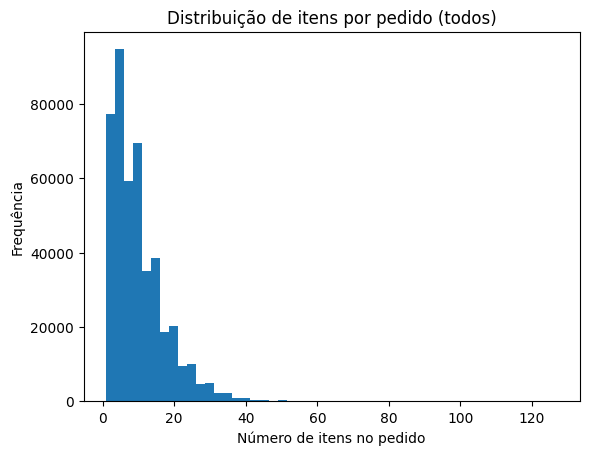

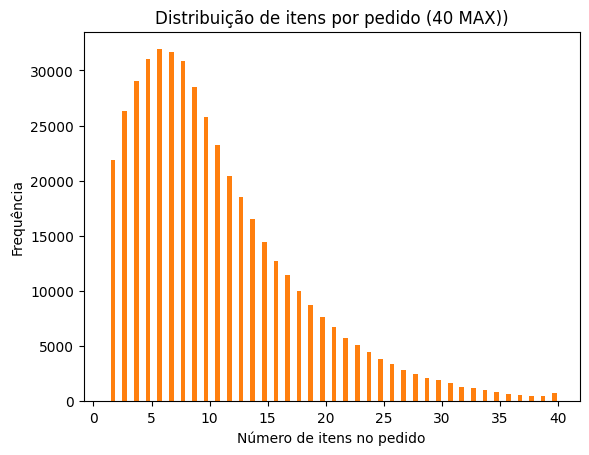

In [52]:

plt.hist(products_per_order["product_id"], bins=50)
plt.title("Distribuição de itens por pedido (todos)")
plt.xlabel("Número de itens no pedido")
plt.ylabel("Frequência")
plt.show()

print()
print()
print()

#poucos pedidos tem mais de 40 itens, por isso criei um gráfico mais específico para facilitar a visualização

filtered = products_per_order[products_per_order["product_id"] <= 40] #filtrando apenas pedidos com menos de 40 itens
bins= range(1, 41) #definindo as bordas do histograma
plt.hist(filtered, bins= bins)
plt.title("Distribuição de itens por pedido (40 MAX))")
plt.xlabel("Número de itens no pedido")
plt.ylabel("Frequência")
plt.xlim= (0, 40)


### [C2] Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.

In [53]:
product_and_orders = df_orders.merge(df_products, on= "product_id") #juntando os DataFrames necessários
print(product_and_orders.head())#testando

   order_id  product_id  add_to_cart_order  reordered  \
0   2141543       11440                 17          0   
1    147172       11440                  7          1   
2   3341719       11440                  4          1   
3   1938779       11440                  8          1   
4   1728338       11440                 23          0   

                     product_name  aisle_id  department_id  
0  chicken breast tenders breaded       129              1  
1  chicken breast tenders breaded       129              1  
2  chicken breast tenders breaded       129              1  
3  chicken breast tenders breaded       129              1  
4  chicken breast tenders breaded       129              1  


In [54]:
reordered_only = product_and_orders[product_and_orders["reordered"] == 1] #filtrando apenas pedidos repetidos

In [55]:
reordered_count = reordered_only.groupby(["product_id", "product_name"])["order_id"].count().reset_index(name= "reordered_count").sort_values("reordered_count", ascending= False)
#agrupando por nome e ID. Contando, resetando o índice para não dar problemas e classificando por ordem

In [56]:
print(reordered_count.head(20)) #imprimindo os 20 incluídos com mais frequência em pedidos repetidos

       product_id              product_name  reordered_count
18104       24852                    banana            55763
9528        13176    bag of organic bananas            44450
15368       21137      organic strawberries            28639
15936       21903      organic baby spinach            26233
34407       47209      organic hass avocado            23629
34828       47766           organic avocado            18743
20285       27845        organic whole milk            16251
34725       47626               large lemon            15044
20375       27966       organic raspberries            14748
12193       16797              strawberries            13945
19088       26209                     limes            13327
16700       22935      organic yellow onion            11145
18186       24964            organic garlic            10411
32792       45007          organic zucchini            10076
36219       49683            cucumber kirby             9538
20543       28204       


Esta informação foi de acordo com as outras que descobrimos nas demais etapas. As bananas continuam dominando, e produtos orgânicos/naturais são os preferidos do público.

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [57]:
products_on_orders = df_orders.merge(df_products, on= "product_id", how= "left") #juntando os dataframes necessários
print(products_on_orders.head()) #testando

   order_id  product_id  add_to_cart_order  reordered  \
0   2141543       11440                 17          0   
1    567889        1560                  1          1   
2   2261212       26683                  1          1   
3    491251        8670                 35          1   
4   2571142        1940                  5          1   

                                        product_name  aisle_id  department_id  
0                     chicken breast tenders breaded       129              1  
1                                         bag of ice        37              1  
2  cafe latte pure lightly sweetened iced coffee ...        91             16  
3                                     diced tomatoes        81             15  
4                        organic 2% reduced fat milk        84             16  


In [58]:

total_orders = products_on_orders.groupby(["product_id", "product_name"])["order_id"].count().reset_index(name= "total_orders") #agrupando os pedidos e contando as vezes em que os produtos são comprados
print(total_orders.sort_values(by= "total_orders", ascending= False).head()) #testando
print()
print()
reorder_count = products_on_orders.groupby(["product_id", "product_name"])["reordered"].sum().reset_index(name= "reorder_count") #agrupando os pedidos recomprados e somando (como o valor para recomprados é 1 e para não recomprados é 0, a soma só vai ser afetada pelos recomprados)
print(reorder_count.head()) #testando

rates = total_orders.merge(reorder_count, on=["product_id", "product_name"]) #juntando os dataframes em um novo em que vou incluir as taxas
print(rates.head())

       product_id            product_name  total_orders
22808       24852                  banana         66050
12025       13176  bag of organic bananas         53297
19370       21137    organic strawberries         37039
20077       21903    organic baby spinach         33971
43271       47209    organic hass avocado         29773


   product_id                                       product_name  \
0           1                         chocolate sandwich cookies   
1           2                                   all-seasons salt   
2           3               robust golden unsweetened oolong tea   
3           4  smart ones classic favorites mini rigatoni wit...   
4           7                     pure coconut water with orange   

   reorder_count  
0            158  
1              0  
2             31  
3             25  
4              1  
   product_id                                       product_name  \
0           1                         chocolate sandwich cookies   
1  

In [59]:
rates["reorder_rate"] = (rates["reorder_count"]/rates["total_orders"])*100 #calculando a taxa de recompra e atribuindo ela à uma nova coluna
rates = rates.drop(columns=["total_orders", "reorder_count"]) #retirando colunas desnecessárias
print(rates)

       product_id                                       product_name  \
0               1                         chocolate sandwich cookies   
1               2                                   all-seasons salt   
2               3               robust golden unsweetened oolong tea   
3               4  smart ones classic favorites mini rigatoni wit...   
4               7                     pure coconut water with orange   
...           ...                                                ...   
45568       49690                      high performance energy drink   
45569       49691                      original pancake & waffle mix   
45570       49692    organic instant oatmeal light maple brown sugar   
45571       49693                             spring water body wash   
45572       49694                            burrito- steak & cheese   

       reorder_rate  
0         56.428571  
1          0.000000  
2         73.809524  
3         51.020408  
4         50.000000  
...

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [60]:

client_order = df_instacart.merge(df_orders, on= "order_id") #juntadno os dataframes necessários
print(client_order.head()) #testando

print()

orders_by_clients = client_order.groupby("user_id")["order_id"].count().reset_index(name="orders_by_clients") #contando o número de pedidos por cliente
print(orders_by_clients.head()) #testando 

print()

reorders_by_clients = client_order.groupby("user_id")["reordered"].sum().reset_index(name="reorders_by_clients") #agrupando os pedidos recomprados e somando (como o valor para recomprados é 1 e para não recomprados é 0, a soma só vai ser afetada pelos recomprados)
print(reorders_by_clients.head())


   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1515936   183418            11          6                 13   
2   1515936   183418            11          6                 13   
3   1515936   183418            11          6                 13   
4   1515936   183418            11          6                 13   

   days_since_prior_order  product_id  add_to_cart_order  reordered  
0                    30.0       19048                  1          1  
1                    30.0       47766                  3          1  
2                    30.0       45066                  9          0  
3                    30.0       24082                 11          0  
4                    30.0       24363                  4          0  

   user_id  orders_by_clients
0        2                 26
1        4                  2
2        5                 12
3        6                  4
4        7          

In [61]:
order_reorder = orders_by_clients.merge(reorders_by_clients, on= "user_id")
order_reorder["reorder_rate"] = (order_reorder["reorders_by_clients"] / order_reorder["orders_by_clients"]) * 100
print(order_reorder)

        user_id  orders_by_clients  reorders_by_clients  reorder_rate
0             2                 26                    1      3.846154
1             4                  2                    0      0.000000
2             5                 12                    8     66.666667
3             6                  4                    0      0.000000
4             7                 14                   13     92.857143
...         ...                ...                  ...           ...
149621   206203                 27                    6     22.222222
149622   206206                 21                   15     71.428571
149623   206207                 46                   41     89.130435
149624   206208                125                   87     69.600000
149625   206209                 25                    8     32.000000

[149626 rows x 4 columns]


### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [62]:
product_orders = df_orders.merge(df_products, on= "product_id", how= "left") #juntando os dataframes necessários
print(product_orders.head()) #testando se funcionou

   order_id  product_id  add_to_cart_order  reordered  \
0   2141543       11440                 17          0   
1    567889        1560                  1          1   
2   2261212       26683                  1          1   
3    491251        8670                 35          1   
4   2571142        1940                  5          1   

                                        product_name  aisle_id  department_id  
0                     chicken breast tenders breaded       129              1  
1                                         bag of ice        37              1  
2  cafe latte pure lightly sweetened iced coffee ...        91             16  
3                                     diced tomatoes        81             15  
4                        organic 2% reduced fat milk        84             16  


In [63]:
first_items = product_orders[product_orders["add_to_cart_order"] == 1]#filtrando os produtos que foram colocados em primeiro
first_items_count = first_items.groupby("product_name")["product_id"].value_counts() #contando e resetando o índice

print(first_items_count.head()) #testando

product_name                                  product_id
#2 coffee filters                             25773         16
#2 cone white coffee filters                  2158           1
#2 mechanical pencils                         26685          1
#4 natural brown coffee filters               26381          5
+energy black cherry vegetable & fruit juice  11908          1
Name: product_id, dtype: int64


In [64]:

rank = first_items_count.sort_values(ascending= False) #colocando a contagem em ordem do mais frequente para o menos
print("ITENS QUE MAIS SÃO ADICIONADOS POR PRIMEIRO NO CARRINHO")
print()
print(rank.head(20)) #imprimindo os 20 primeiros


ITENS QUE MAIS SÃO ADICIONADOS POR PRIMEIRO NO CARRINHO

product_name                 product_id
banana                       24852         15562
bag of organic bananas       13176         11026
organic whole milk           27845          4363
organic strawberries         21137          3946
organic hass avocado         47209          3390
organic baby spinach         21903          3336
organic avocado              47766          3044
spring water                 19660          2336
strawberries                 16797          2308
organic raspberries          27966          2024
sparkling water grapefruit   44632          1914
organic half & half          49235          1797
large lemon                  47626          1737
soda                         196            1733
organic reduced fat milk     38689          1397
limes                        26209          1370
hass avocados                12341          1340
organic reduced fat 2% milk  5785           1310
half & half          



Produtos orgânicos e frutas no geral tendem a ser os primeiros a serem adicionados no carrinho, da mesma forma que são so mais pedidos como identificamos anteriormente. Inclusive, a banana é tanto o mais pedido quanto o primeiro a ser adicionado no carrinho com maior frequência.

# Conclusão geral do projeto:

Neste projeto, conseguimos informações importantíssimas sobre as vendas do Instacart.

Começando pela que acredito ser a mais relevante, descobrimos que os usuários do app tem grande preferência por:
- Produtos orgânicos
- Produtos naturais
- Frutas e verduras no geral

O que indica preferências por alimentos e um estilo de vida mais saudável. 

Também concluímos que os pedidos são mais frequentes nos primeiros dias da semana (domingo e segunda) e aos sábados, especialmente em horários comerciais, e que se observa uma queda nas vendas nos dias de "meio de semana".  Outro dado relevante é que a fidelização de clientes não parece ser alta, com a grande maioria dos clientes não passando dos 10 pedidos.

Todas estas informações podem facilitar decisões do negócio. Por exemplo, se a fidelização está baixa e os pedidos mais populares são de produtos orgânicos, talvez valha a pena direcionar a comunicação da marca para atrair o público que consome este tipo de produto. Com base nas informações que reunimos, também é possível pensar em outras estratégias, como enviar notificações push preferencialmente durante os horários comerciais e fins de semana ou oferecer cupons de desontos nas terças, quartas e quintas que são dias com menor movimento.

